In [6]:
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D
from sklearn import tree
from sklearn.cluster import DBSCAN
import pandas as pd

## Defining graph measures

In [7]:
from graphfingerprint import *
measures_names = [
                'density',
                'efficiency',
                'frac_largest_connected_component',
                'connected_components_ent',
                'frac_center',
                'frac_periphery',
                'frac_barycenter',
                'transitivity',
                'avg_clustering',
                'avg_square_clustering',
                'modularity',
                'assortativity_coefficient_analysis',
                'normalized_shortest_path_length_analysis',
                'eccentricity_avg',
                'degree_analysis_avg',
                'communicability_avg',
                'similarity_analysis_avg',
                'Avg_Node_betweenness_centrality',
                'Avg_edge_betweenness_centrality']



nb_measures = len(measures_names)
nb_measures

19

### Defining the RGB codes

['#1b3f7d', '#91cbc2', '#f9e6ab', '#ea956a']


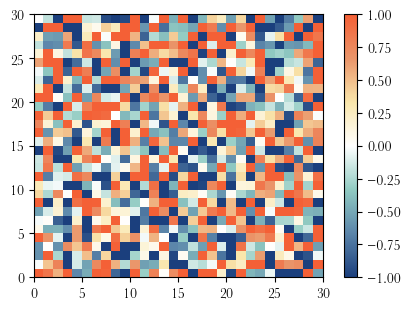

In [8]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Baskerville']
rgb_codes = [(27,63,125),
             (145, 203, 194),
            (249, 230, 171),
            (234, 149, 106)]

# Convert RGB codes to color strings
colors = ['#%02x%02x%02x' % rgb for rgb in rgb_codes]

# Print the list of colors
print(colors)

colors_ =["#1b3f7d","#5B85AA", "#91cbc2","white", "#f9e6ab", "#ea956a","#F46036"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors_)
cmap_r = cmap.reversed()
plot_examples([cmap])
# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["white","#1b3f7d","#5B85AA", "#91cbc2","#f9e6ab", "#ea956a","#F46036"]) 

## Basic example: random graph

In [9]:
N = 100
adj = np.random.rand(N,N)
adj = (adj>0.9).astype('double')
adj = normalize_adjacency(adj, method = 'max')

fp = fingerprint(adj)

print('Fingerprint as a dictionary:\n')
print(fp)
print('\nFingerprint as an array:\n')
print(dict_to_vec(fp))

Fingerprint as a dictionary:

{'density': 0.1892929292929293, 'efficiency': 0.5888215488215469, 'frac_largest_connected_component': 1.0, 'connected_components_ent': 0, 'frac_center': 0.14, 'frac_periphery': 0.86, 'frac_barycenter': 0.01, 'transitivity': 0.1895917294550552, 'avg_clustering': 0.19004425891923885, 'avg_square_clustering': 0.10564876305509437, 'modularity': 0.1667832235534512, 'assortativity_coefficient_analysis': -0.06019931829001419, 'normalized_shortest_path_length_analysis': 0.0186021834506683, 'eccentricity_avg': array([0.03030303]), 'degree_analysis_avg': array([0.185]), 'communicability_avg': array([0.00738421]), 'similarity_analysis_avg': array([0.18181818]), 'Avg_Node_betweenness_centrality': 0.008587920016491444, 'Avg_edge_betweenness_centrality': 0.0019654388064206615}

Fingerprint as an array:

[ 0.18929293  0.58882155  1.          0.          0.14        0.86
  0.01        0.18959173  0.19004426  0.10564876  0.16678322 -0.06019932
  0.01860218  0.03030303  0.1

### Load all numpy arrays and perfom graph measures

In [10]:

cwd = os.getcwd()
files = os.listdir(cwd + '/adj_mat/')

In [12]:
data_directory = "/Users/behnaz/NCADD/paper_pipeline_v1/graph_measures/adj_mat/"
graph_measures = np.empty((0,nb_measures))
all_npy_files = []
graph_names =[]
N = 0
for file in os.listdir(data_directory):
    if file.startswith("pre"):
        if file.endswith(".npy"):
            all_npy_files.append(file)
            
all_names = sorted(all_npy_files, key = lambda x: (str(x[5:10])))
N=0
#all_names
for file in all_names:
    name = os.path.splitext(file)[0]
    print(name,N)
    graph_names.append(name)
    adj = np.load('adj_mat/'+ file)
    Adj = np.array(adj>0).astype('float')
    Adj = normalize_adjacency(Adj, method = 'max')
    results = dict_to_vec(fingerprint(Adj))
    graph_measures = np.vstack((graph_measures, np.real(results)))
    N=N+1

pre3_05DIV_CS4_FOV5 0
pre2_05DIV_CS1_FOV1 1
pre3_05DIV_CS5_FOV4 2
pre3_05DIV_CS4_FOV4 3
pre3_05DIV_CS5_FOV6 4
pre3_05DIV_CS4_FOV6 5
pre2_05DIV_CS1_FOV2 6
pre2_05DIV_CS1_FOV3 7
pre3_05DIV_CS5_FOV3 8
pre3_05DIV_CS4_FOV3 9
pre3_05DIV_CS4_FOV2 10
pre3_05DIV_CS5_FOV2 11
pre2_05DIV_CS1_FOV4 12
pre3_05DIV_CS5_FOV1 13
pre1_05DIV_CS1_FOV1 14
pre3_05DIV_CS4_FOV1 15
pre3_05DIV_CS2_FOV3 16
pre3_05DIV_CS2_FOV2 17
pre3_05DIV_CS2_FOV1 18
pre3_05DIV_CS3_FOV1 19
pre3_05DIV_CS2_FOV4 20
pre3_05DIV_CS3_FOV4 21
pre2_05DIV_CS2_FOV4 22
pre2_05DIV_CS3_FOV4 23
pre3_05DIV_CS6_FOV1 24
pre1_05DIV_CS3_FOV1 25
pre1_05DIV_CS2_FOV1 26
pre1_05DIV_CS3_FOV3 27
pre1_05DIV_CS2_FOV2 28
pre3_05DIV_CS6_FOV2 29
pre1_05DIV_CS3_FOV2 30
pre2_05DIV_CS3_FOV2 31
pre2_05DIV_CS3_FOV3 32
pre2_05DIV_CS3_FOV1 33
pre1_05DIV_CS3_FOV4 34
pre1_05DIV_CS2_FOV4 35
pre2_05DIV_CS4_FOV3 36
pre2_05DIV_CS4_FOV1 37
pre1_05DIV_CS4_FOV4 38
pre3_05DIV_CS1_FOV4 39
pre2_05DIV_CS4_FOV4 40
pre2_05DIV_CS4_FOV5 41
pre1_05DIV_CS4_FOV1 42
pre3_05DIV_CS1_FOV1 4

In [13]:
measures = np.nan_to_num(graph_measures)

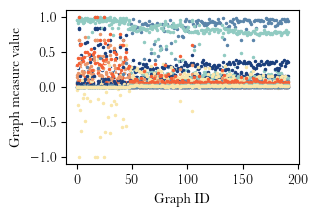

In [14]:
# visualising graph measures values
plt.figure(figsize=(3,2))
plt.plot(measures,'.', markersize=3)
plt.ylabel('Graph measure value')
plt.xlabel('Graph ID')
#plt.savefig('unNormalized_graph_measure.svg')
plt.show()

In [15]:
# normalizing values between 0-1
min_value = 0
max_value = 1
# Assuming measures.T is a 2D array with shape (19, 192)
scaler = MinMaxScaler(feature_range=(min_value, max_value))

# Fit the scaler on your data and transform it
normalized_measures = scaler.fit_transform(measures)

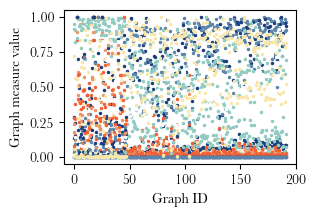

In [16]:
plt.figure(figsize=(3,2))
plt.plot(normalized_measures,'.', markersize=3)
plt.ylabel('Graph measure value')
plt.xlabel('Graph ID')
#plt.savefig('Normalized_graph_measure.svg')
plt.show()

### Pearson correlation of graphs measures and cluster map

In [17]:
#Figure labels
measures_names = [
                'Density',
                'Efficiency',
                'FONs in the largest connected component',
                'Connected components entropy',
                'FONs in the center',
                'FONs in the periphery',
                'FONs in the barycenter',
                'Transitivity',
                'Average clustering coefficient',
                'Average square clustering',
                'Modularity',
                'Assortativity coefficient analysis',
                'Shortest path length analysis',
                'Average eccentricity',
                'Degree analysis',
                'Average communicability',
                'Similarity analysis',
                'Average node betweenness centrality',
                'Average edge betweenness centrality']

In [18]:
# Pearson correlation
corr = np.corrcoef(normalized_measures.T)

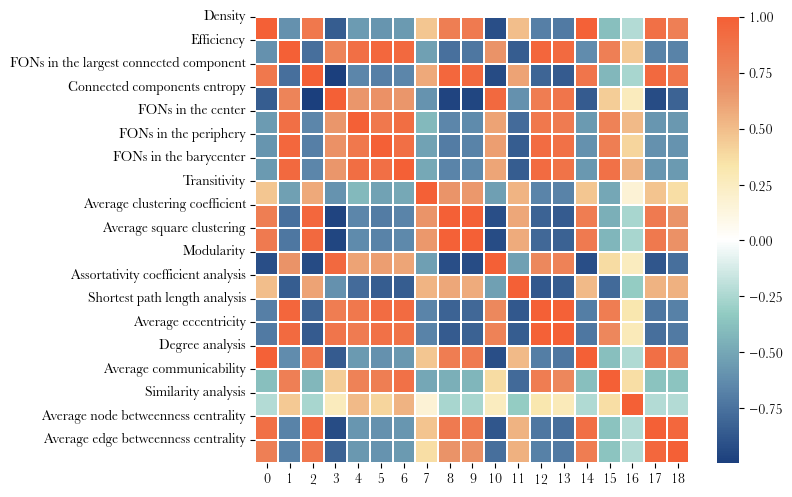

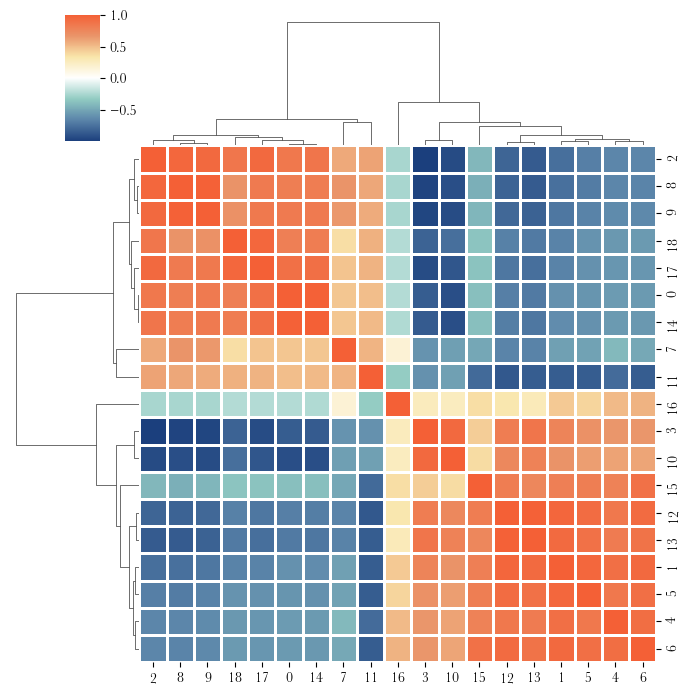

In [19]:

fig, ax = plt.subplots(figsize=(7, 5.8))

g = sns.heatmap(corr, cmap=cmap,linewidths=0.01)

plt.yticks(np.arange(len(measures_names)), measures_names, rotation=0)
#plt.savefig('Correlation.svg')
plt.show()

# Create a clustermap
g = sns.clustermap(corr,metric='euclidean', cmap=cmap,square=False,linewidths=0.9, figsize=(7, 7),
                   cbar_pos=(0.1, 0.8, 0.05, 0.18),colors_ratio=0.03, row_cluster=True, col_cluster=True)

#plt.savefig('clustermap_corr_3.svg')
plt.show()


In [20]:
# Get the graph name (day in vitro)
data_directory = "/Users/behnaz/NCADD/paper_pipeline_v1/graph_measures/adj_mat/"
graph_measures = np.empty((0, nb_measures))
all_npy_files = []
graph_names = []

# Collect all the relevant .npy files
for file in os.listdir(data_directory):
    if file.startswith("pre") and file.endswith(".npy"):
        all_npy_files.append(file)

# Sort the files based on a specific pattern
all_names = sorted(all_npy_files, key=lambda x: (str(x[5:10])))

# Iterate through the sorted files
for file in all_names:
    name = os.path.splitext(file)[0]
    graph_names.append(name)


ids = []
for i in range(len(graph_names)):
    value = graph_names[i].split('_')[1]
    ids.append(int(value[0:2]))
print(ids)
print(len(ids))

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
192


### UMAP embeding

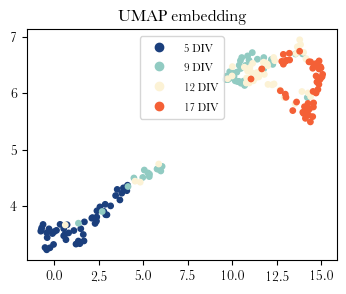

In [446]:
plt.figure(figsize=(4, 3))
fit = umap.UMAP(n_neighbors=10, min_dist=0.15, n_components=4,)
u = fit.fit_transform(normalized_measures)
umap1 = u[:, 0] # first UMAP axis
umap2 = u[:, 1] # second UMAP axis
scatter =plt.scatter(u[:,0], u[:,1], c = np.array(ids), s=15.0,  cmap = cmap)
plt.title('UMAP embedding')

# Create a legend with unique numerical values
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
unique_ids = np.unique(ids)
legend_labels = [f'{id} DIV' for id in unique_ids]

# Extract handles from scatter.legend_elements()
handles, _ = scatter.legend_elements()
legend = plt.legend(handles=handles, labels=legend_labels, loc='upper center')

# Customize the legend title and labels
plt.setp(legend.get_title(), fontsize=10)
for text in legend.get_texts():
    text.set_fontsize(8)
#plt.savefig('UMAPEmbeding.svg')
plt.show()

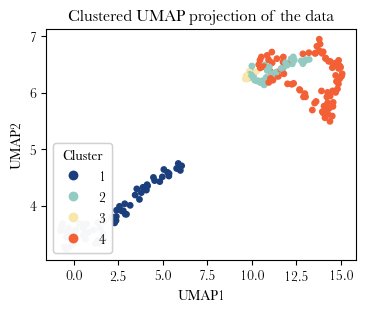

In [450]:
db =DBSCAN(eps=0.56, min_samples=4).fit(u)
labels = db.labels_
_labels = np.copy(labels)

fig, ax = plt.subplots(figsize=(4,3))
scatter = plt.scatter(umap1, umap2, s=15.0,c=_labels+1, cmap=cmap)
plt.title('Clustered UMAP projection of the data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)
#plt.savefig('umap_behavioral_data.pdf')
plt.show()

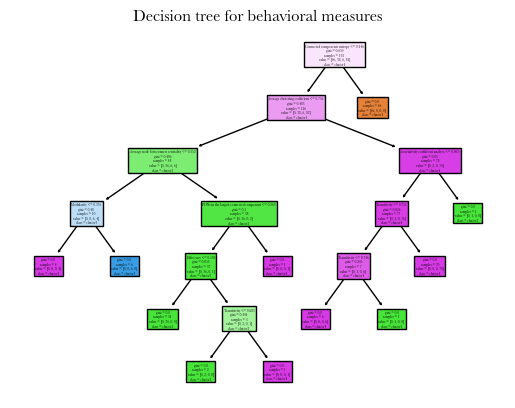

Importance of Efficiency = 0.004839599309645408
Correlation of Efficiency with UMAP1 = -0.7593073948061821
Correlation of Efficiency with UMAP2 = -0.7623923224078158
Importance of FONs in the largest connected component = 0.014563747767725455
Correlation of FONs in the largest connected component with UMAP1 = 0.9705882721495457
Correlation of FONs in the largest connected component with UMAP2 = 0.9536597423307522
Importance of Connected components entropy = 0.5189817862628923
Correlation of Connected components entropy with UMAP1 = -0.9751978388778888
Correlation of Connected components entropy with UMAP2 = -0.944594534317327
Importance of Transitivity = 0.02612792079546522
Correlation of Transitivity with UMAP1 = 0.5865301317053581
Correlation of Transitivity with UMAP2 = 0.5347446347741341
Importance of Average clustering coefficient = 0.29618001046572473
Correlation of Average clustering coefficient with UMAP1 = 0.9535387267692725
Correlation of Average clustering coefficient with U

In [451]:
clf = tree.DecisionTreeClassifier(random_state=25)
clf = clf.fit(normalized_measures, labels)
tree.plot_tree(clf, filled=True, feature_names=measures_names, class_names = ['cluster1', 'cluster2', 'cluster3','cluster4'])
plt.title("Decision tree for behavioral measures")
#plt.savefig('behavioral_decision_tree.pdf')
plt.show()

decision_features = []
decision_features_ID = []
importances = clf.feature_importances_
for i in range(len(importances)):
    if importances[i]>0:
            decision_features.append(measures_names[i])
            decision_features_ID.append(i)
            print('Importance of '+ measures_names[i] + ' = '+str(importances[i]))
            print('Correlation of '+ measures_names[i] + ' with UMAP1 = '
                      +str(np.corrcoef(normalized_measures[:, i], umap1)[0,1]))
            print('Correlation of '+ measures_names[i] + ' with UMAP2 = '
                      +str(np.corrcoef(normalized_measures[:, i], umap2)[0,1]))            

In [452]:
decision_features 

['Efficiency',
 'FONs in the largest connected component',
 'Connected components entropy',
 'Transitivity',
 'Average clustering coefficient',
 'Modularity',
 'Assortativity coefficient analysis',
 'Average node betweenness centrality']

In [453]:
decision_features_ID

[1, 2, 3, 7, 8, 10, 11, 17]

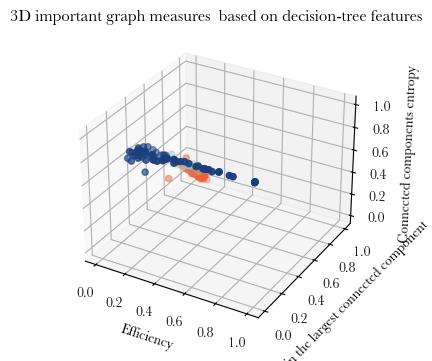

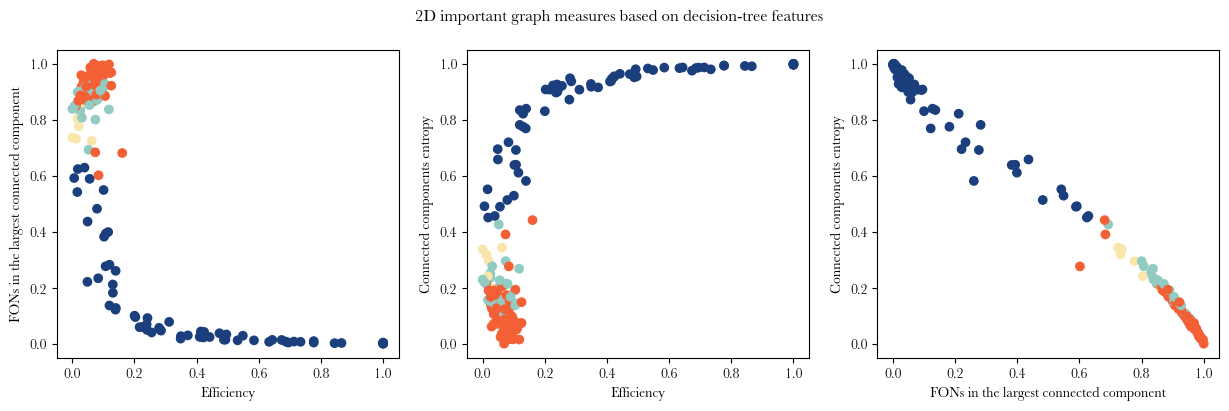

In [454]:
# Select the columns in data matrix associated to decision features
behavioral_measure_1 = normalized_measures[:,decision_features_ID[0]]
behavioral_measure_2 = normalized_measures[:,decision_features_ID[1]]
behavioral_measure_3 = normalized_measures[:,decision_features_ID[2]]


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection='3d')
ax.scatter(behavioral_measure_1, behavioral_measure_2, behavioral_measure_3, c= labels, cmap=cmap)
ax.set_xlabel(decision_features[0])
ax.set_ylabel(decision_features[1])
ax.set_zlabel(decision_features[2])
ax.set_title('3D important graph measures  based on decision-tree features')
plt.show()


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(15, 4))


ax0.scatter(behavioral_measure_1, behavioral_measure_2, c= labels, cmap=cmap)
ax0.set_xlabel(decision_features[0])
ax0.set_ylabel(decision_features[1])

ax1.scatter(behavioral_measure_1, behavioral_measure_3, c= labels, cmap=cmap)
ax1.set_xlabel(decision_features[0])
ax1.set_ylabel(decision_features[2])

ax2.scatter(behavioral_measure_2, behavioral_measure_3, c= labels, cmap=cmap)
ax2.set_xlabel(decision_features[1])
ax2.set_ylabel(decision_features[2])

fig.suptitle('2D important graph measures based on decision-tree features')
plt.show()

### PCA analysis

PCA variance ratio: [0.80191165 0.09271608 0.03868982 0.02001516]


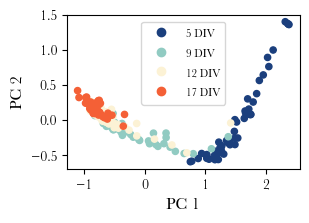

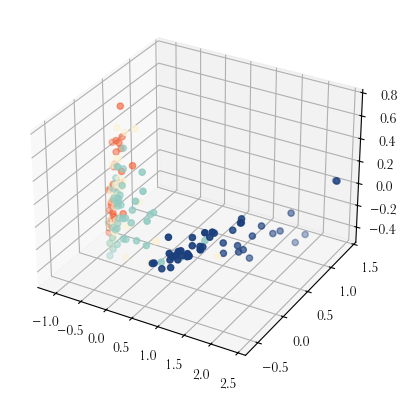

<Figure size 400x300 with 0 Axes>

In [455]:


pca = PCA(n_components=4)
pca.fit((normalized_measures))

print('PCA variance ratio:',pca.explained_variance_ratio_)

plt.figure(figsize=(3, 2))
X_pca = pca.transform(normalized_measures)
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=ids,s=20,cmap=cmap)


# Create a legend with unique numerical values
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
unique_ids = np.unique(ids)
legend_labels = [f'{id} DIV' for id in unique_ids]

# Extract handles from scatter.legend_elements()
handles, _ = scatter.legend_elements()
legend = plt.legend(handles=handles, labels=legend_labels, loc='upper center')

# Customize the legend title and labels
plt.setp(legend.get_title(), fontsize=10)
for text in legend.get_texts():
    text.set_fontsize(8)

# Set labels for the axes
plt.xlabel("PC 1", fontsize=12)
plt.ylabel("PC 2", fontsize=12)

# Save the plot
#plt.savefig('PCA.svg')
plt.show()

fig = plt.figure()
plt.figure(figsize=(4, 3))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=ids,s=20,cmap=cmap)
plt.show()

#the variance of each components

### Most important measures for the first 7 components

FONs in the largest connected component id 2: 1.0
Efficiency id 1: 0.9860391609921233
FONs in the periphery id 5: 0.9692458203785086
Connected components entropy id 3: 0.9155025226699142
Average node betweenness centrality id 17: 0.9051048787242915
Modularity id 10: 0.8916005230236111
Average communicability id 15: 0.8765893887954729
Assortativity coefficient analysis id 11: 0.8196918111191533
FONs in the barycenter id 6: 0.8194669341512261
Shortest path length analysis id 12: 0.8109198269666904
Average eccentricity id 13: 0.7732065877669464
Average square clustering id 9: 0.7435441029271137
Density id 0: 0.7185763286656711
Degree analysis id 14: 0.7125303960215401
Average clustering coefficient id 8: 0.664234351498597
Average edge betweenness centrality id 18: 0.6459062804983106
FONs in the center id 4: 0.6394006431129651
Transitivity id 7: 0.3264505261425827
Similarity analysis id 16: 0.26405176957613735


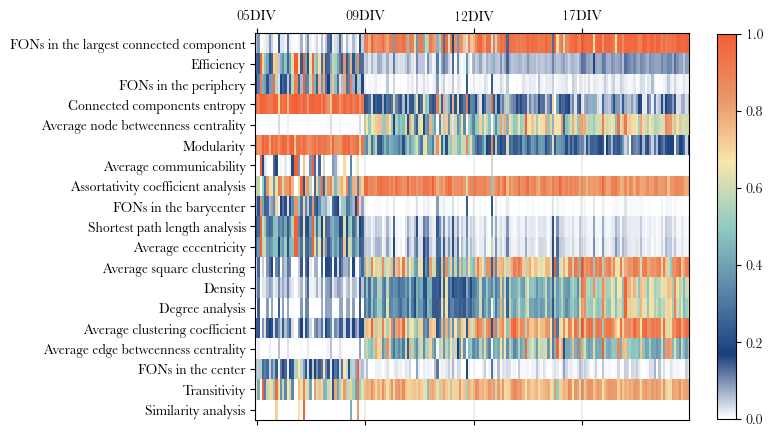

In [456]:
cumulative_contribution = np.sum(np.abs((pca.components_[0:2,:])), axis=0) #normalize and check the expression it
cumulative_contribution= cumulative_contribution/np.max(cumulative_contribution)
important_measures_id = np.argsort(cumulative_contribution)[::-1]
for measure_id in important_measures_id:
    print(measures_names[measure_id]+' id '+str(measure_id)+': ' +str(cumulative_contribution[measure_id]))
    
colors1 = ["white","#1b3f7d","#5B85AA", "#91cbc2","#f9e6ab", "#ea956a","#F46036"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors1)
cmap_r1 = cmap.reversed()


# Rearrange rows of the measures matrix based on important_measures_id
reordered_measures = normalized_measures.T[important_measures_id, :]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 10))

# Plot the heatmap with reordered rows
heatmap = ax.matshow(reordered_measures, cmap=cmap1, aspect=9)

# Set y-axis labels using important_measures_id
y_tick_positions = range(len(important_measures_id))
y_tick_labels = [f"{measures_names[i]}" for i in important_measures_id]
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_tick_labels, rotation=0)

# Set x-tick positions and labels
x_tick_positions = range(0, len(all_names), 48)
x_tick_labels = [str(all_names[i][5:10]) for i in x_tick_positions]
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels, rotation=0)

# Add vertical lines where new x-labels start
for x in x_tick_positions[1:]:
    ax.axvline(x=x, color='k', linestyle='-', linewidth=0.1)

plt.axis()
plt.colorbar(heatmap, shrink=0.5)
#plt.savefig('important_measures_id.svg')
plt.show()


The two important measures for categorizing conditions based on the PCA1 and PCA2 are FONs in the largest connected component and Efficiency


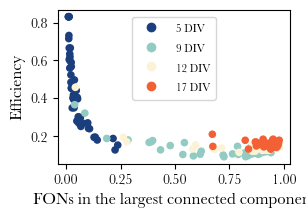

In [457]:
# Extracting columns for the selected measures
x = measures[:, important_measures_id[0]]
y = measures[:, important_measures_id[1]]
print('The two important measures for categorizing conditions based on the PCA1 and PCA2 are',str(measures_names[important_measures_id[0]]),str('and'), str(measures_names[important_measures_id[1]]))
# Creating a scatter plot
fig, ax = plt.subplots(figsize=(3,2))
scatter = ax.scatter(x, y, c=ids, s=20, cmap=cmap)  # You can replace 'viridis' with your preferred colormap

# Create a legend with unique numerical values
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
unique_ids = np.unique(ids)
legend_labels = [f'{id} DIV' for id in unique_ids]

# Extract handles from scatter.legend_elements()
handles, _ = scatter.legend_elements()
legend = plt.legend(handles=handles, labels=legend_labels, loc='upper center')

# Customize the legend title and labels
plt.setp(legend.get_title(), fontsize=10)
for text in legend.get_texts():
    text.set_fontsize(8)

# Set labels for the axes
plt.xlabel("PC 1", fontsize=12)
plt.ylabel("PC 2", fontsize=12)

# Setting labels for x and y axes
plt.xlabel(str(measures_names[important_measures_id[0]]))
plt.ylabel(str(measures_names[important_measures_id[1]]))
#plt.savefig('two_important_meas.svg')
plt.show()

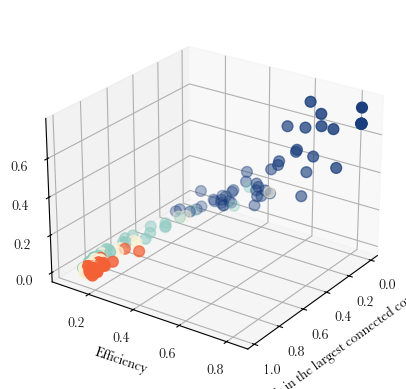

FONs in the largest connected component Efficiency FONs in the periphery


In [458]:
#use important measures to see the clustering
x = measures[:,important_measures_id[0]]
y = measures[:,important_measures_id[1]]
z = measures[:,important_measures_id[2]]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c=ids,s=60,cmap=cmap)
plt.xlabel(str(measures_names[important_measures_id[0]]))
plt.ylabel(str(measures_names[important_measures_id[1]]))
ax.set_zlabel(str(measures_names[important_measures_id[2]]))
ax.view_init(25, 35)
plt.show()
print(str(measures_names[important_measures_id[0]]),str(measures_names[important_measures_id[1]]),
      str(measures_names[important_measures_id[2]]))

In [459]:
# Top 3 of important measures per principal component
for i in range(4):
    print('PC ' +str(i)+'\n')
    contribution = np.abs(pca.components_[i,:])
    important_measures_id = np.argsort(contribution)[::-1]
    for measure_id in important_measures_id[0:5]:
        print(measures_names[measure_id] + ' id ' + str(measure_id) + ': ' + str(contribution[measure_id]))
    print('\n')

PC 0

FONs in the largest connected component id 2: 0.38936741386922735
Connected components entropy id 3: 0.364141778169247
Average clustering coefficient id 8: 0.30580962198467154
Average square clustering id 9: 0.304707635826623
Modularity id 10: 0.29319721906991353


PC 1

Average communicability id 15: 0.38245479003859967
FONs in the periphery id 5: 0.3569156077824963
Efficiency id 1: 0.3440805780775504
Assortativity coefficient analysis id 11: 0.3183146839469249
FONs in the barycenter id 6: 0.3136714516179718


PC 2

Average edge betweenness centrality id 18: 0.5782199649423695
Average clustering coefficient id 8: 0.40874031190534843
Average square clustering id 9: 0.3816120462756822
Average node betweenness centrality id 17: 0.33801252190361614
Transitivity id 7: 0.322039517636612


PC 3

Density id 0: 0.4747323030971271
Degree analysis id 14: 0.4337035341927802
Modularity id 10: 0.3508479657811494
Average edge betweenness centrality id 18: 0.3284553035868627
FONs in the largest